# Dolle Arbitrator - Allocentric MF-MB

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
os.chdir(sys.path[0]+"/..")
cwd = os.getcwd()
print(cwd)

C:\Users\jrusp\Desktop\GitHub\mixed-coordination-models\sources


In [37]:
from grid_search import random_grid_search, compute_clusters_perfs, plot_two_perfs, plot_all_perfs, plot_local
from experimental_data import get_pearce_experimental_data, get_rodrigo_experimental_data
from pearce_protocol import perform_group_pearce, plot_pearce, create_path_main_pearce
from rodrigo_protocol import perform_group_rodrigo, create_path_rodrigo
from exp3_pearce_protocol import perform_group_exp3_pearce

from environments.HexWaterMaze import EnvironmentParams
from agents.agent import AgentsParams

import warnings
warnings.filterwarnings('ignore')

### Definition of the experimental data to reproduce

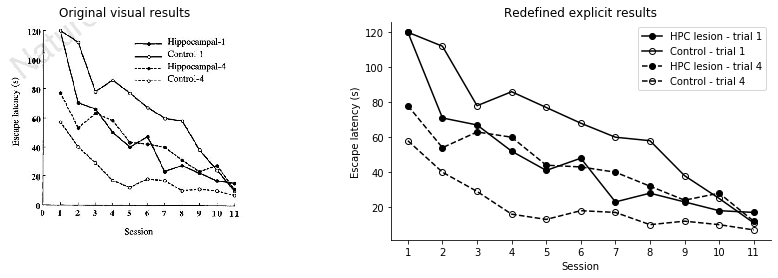

In [17]:
experimental_data_pearce = get_pearce_experimental_data()

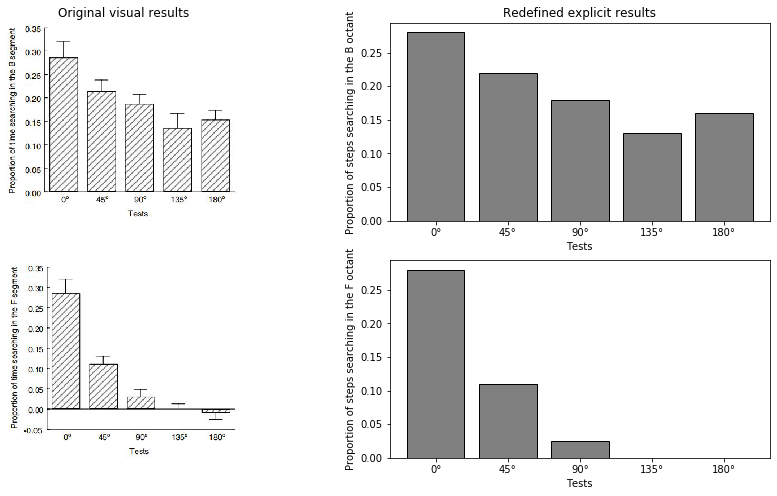

In [4]:
experimental_data_rodrigo = get_rodrigo_experimental_data()

## Hyperparameters optimization of Geerts model on Pearce (1998) and Rodrigo (2006) data

#### Simulation of 2000 datapoints on both experiments

In [5]:
path = "dolle_allo_MB6"

In [5]:
function = "main_pearce"
n_datapoints = 2000
mf_allo = True
dolle = True
HPCmode = "MB"
range_qlr = (0.01, 0.4)
range_eta = (0.01, 0.4)
range_gamma = (0.7, 0.99)
range_inv_temp = (5, 150)
sr_lr = 0.07

random_grid_search(path, function, n_datapoints, mf_allo, dolle, HPCmode, srlr=sr_lr, range_qlr=range_qlr, range_eta=range_eta, range_gamma=range_gamma, range_inv_temp=range_inv_temp)

Directory  ../results/dolle_allo_MB6  already exists


In [ ]:
function = "rodrigo"
n_datapoints = 2000
mf_allo = True
dolle = True
HPCmode = "MB"
range_qlr = (0.01, 0.4)
range_eta = (0.01, 0.4)
range_gamma = (0.7, 0.99)
range_inv_temp = (5, 150)
sr_lr = 0.07

random_grid_search(path, function, n_datapoints, mf_allo, dolle, HPCmode, srlr=sr_lr, range_qlr=range_qlr, range_eta=range_eta, range_gamma=range_gamma, range_inv_temp=range_inv_temp)

#### Clustering of the mean performances of 2000 local groups of datapoints

In [206]:
compute_clusters_perfs(path, 100, experimental_data_pearce, experimental_data_rodrigo, relative=True)

Using 1675 remaining datapoints


#### Removal of clusters that do not validate the required statistical tests

In [207]:
perform_statical_analyses_pearce("dolle_allo_MB6")

Retrieving all agents data
Performing ANOVA


In [208]:
perform_statical_analyses_rodrigo("dolle_allo_MB6")

Retrieving all agents data
Concatenating all data
Computing proximal and distal octants mean occupation on test episodes
Performing statistical analyses


#### Plotting of the sets of parameters associated with the lowest MSE for each 2D bin
White bins means that no datapoints in the bin satisfied all the statistical tests

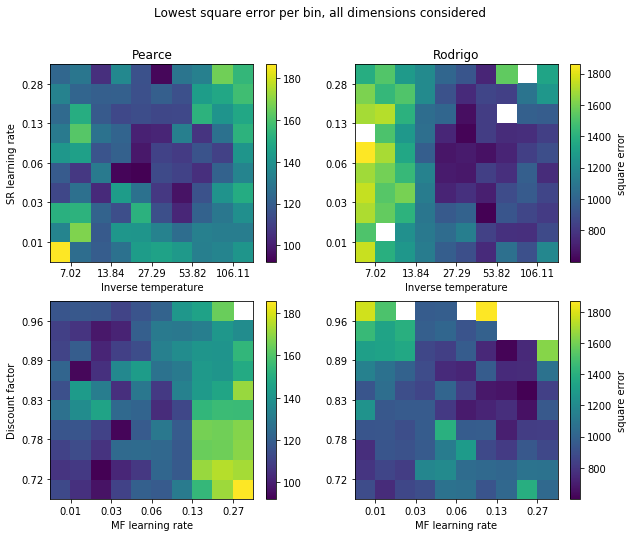

Best three sets of parameters on Pearce's data


Best three sets of parameters on Rodrigo's data


In [8]:
res_df = plot_all_perfs(path, size_plot=10, relative=True, mode="dolle")

### Awaited performances of the set of parameters at index 1178 and 1403 on respectively Pearce's and Rodrigo's protocol

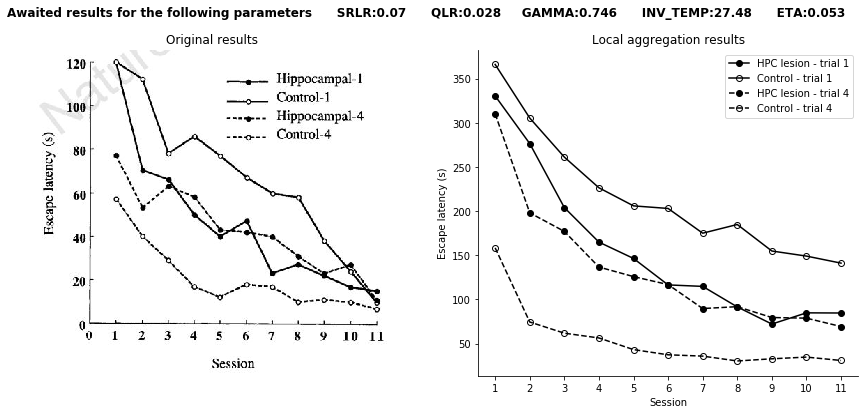

In [9]:
plot_local("main_pearce", res_df, 618)

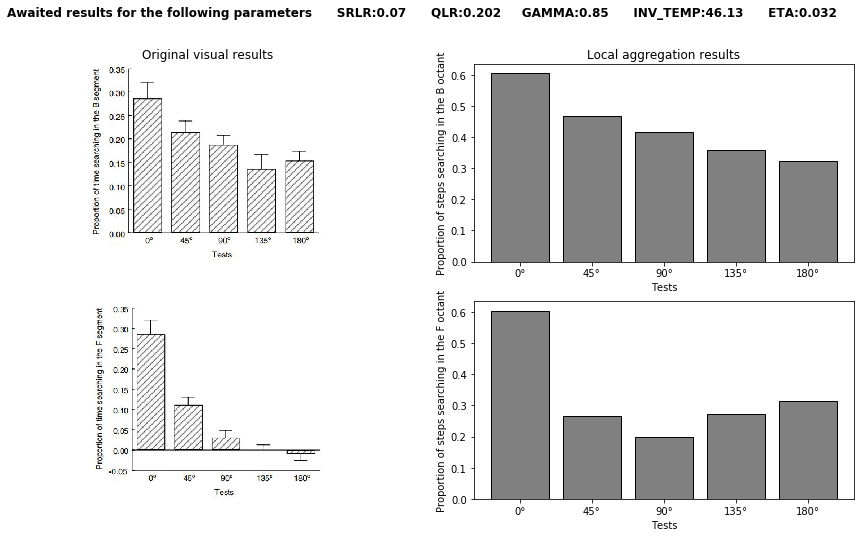

In [10]:
plot_local("rodrigo", res_df, 1604)

# Testing the grid-search predictions: Pearce, Roberts, Good (1998) experiment

## Control agents training

In [38]:
env_params = EnvironmentParams()
env_params.maze_size = 10
env_params.n_sessions = 11
env_params.n_trials = 4
env_params.n_agents = 100
env_params.landmark_dist = 4
env_params.time_limit = 500
env_params.starting_states = [243,230,270,257]

ag_params = AgentsParams()
ag_params.mf_allo = True
ag_params.hpc_lr = 0.07
ag_params.q_lr = 0.028
ag_params.inv_temp_gd = 27
ag_params.inv_temp_mf = 27
ag_params.arbi_inv_temp = 27
ag_params.gamma = 0.745
ag_params.arbi_learning_rate = 0.053
ag_params.HPCmode = "MB"
ag_params.lesion_HPC = False
ag_params.lesion_DLS = False
ag_params.dolle = True
ag_params.lesion_PFC = False

In [39]:
create_path_main_pearce(env_params, ag_params) # data is stored here

'pearce_10411100True0.070.0282727270.745NoneNoneNoneNoneNone4MB500FalseFalseTrue'

Computing the mean performances of the agents...

Computing a two-way ANOVA on trial and session...
                           sum_sq      df           F         PR(>F)
C(session)           1.443900e+07    10.0  176.991263  1.970084e-313
C(trial)             1.118475e+07     3.0  457.003632  3.781033e-258
C(session):C(trial)  1.639794e+06    30.0    6.700123   1.700793e-26
Residual             3.553638e+07  4356.0         NaN            NaN

Computing the heading-vectors of each strategy...



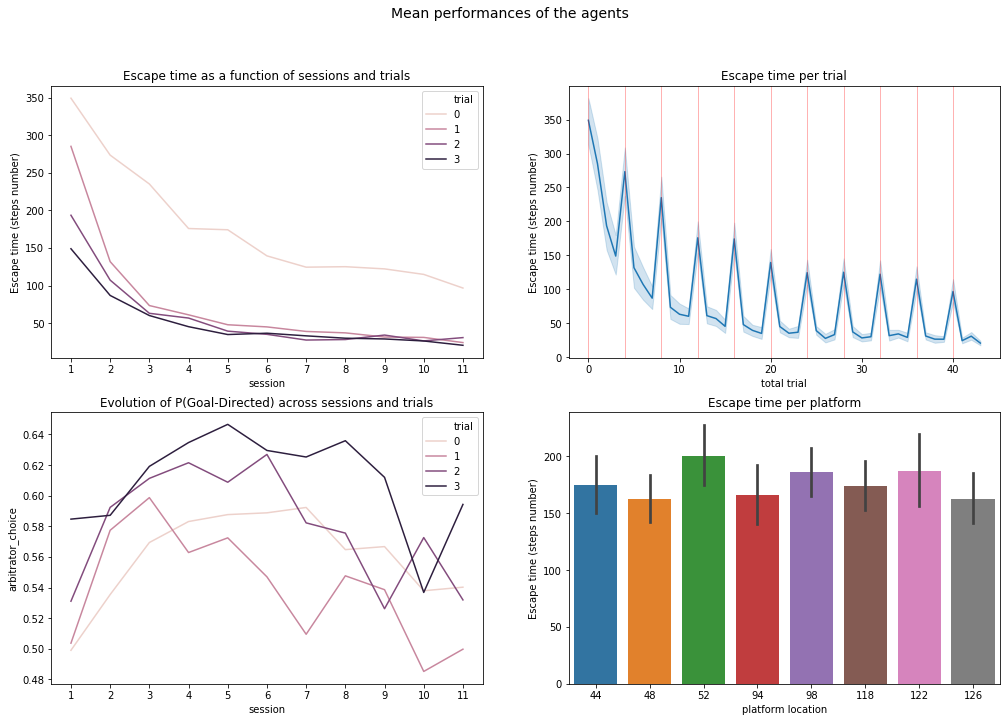

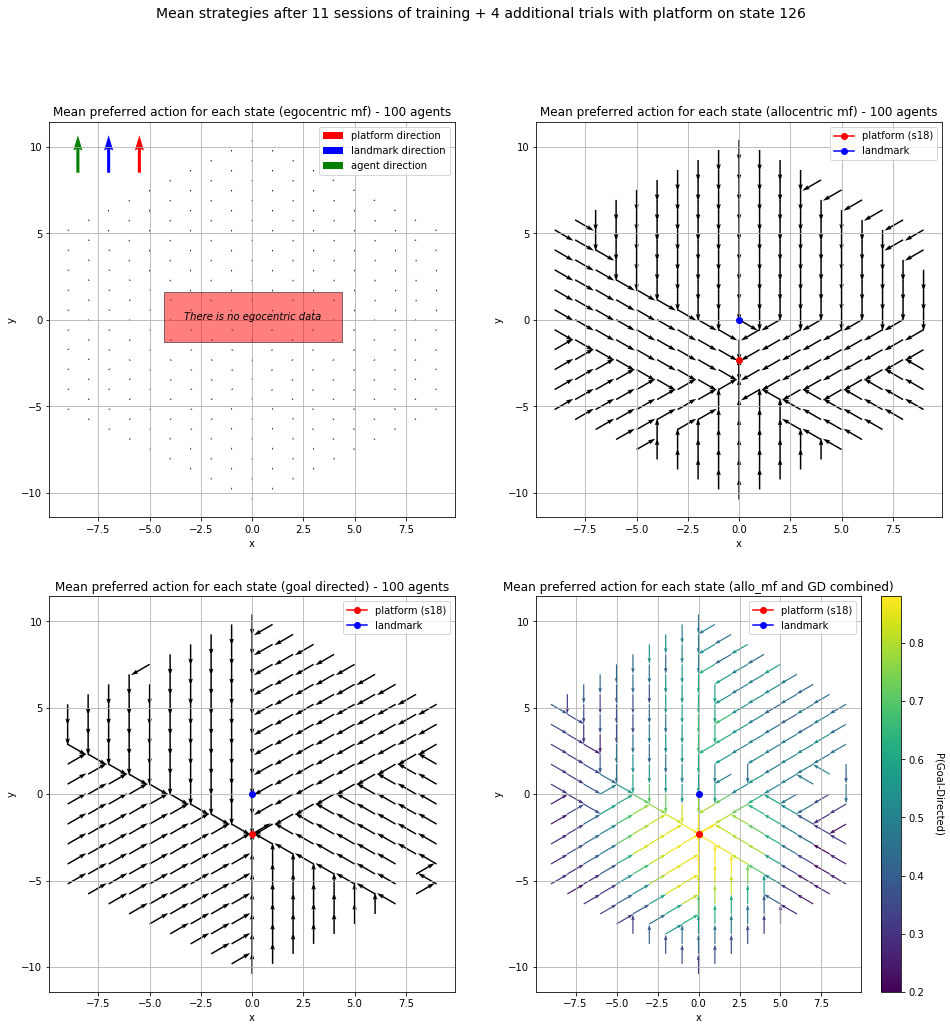

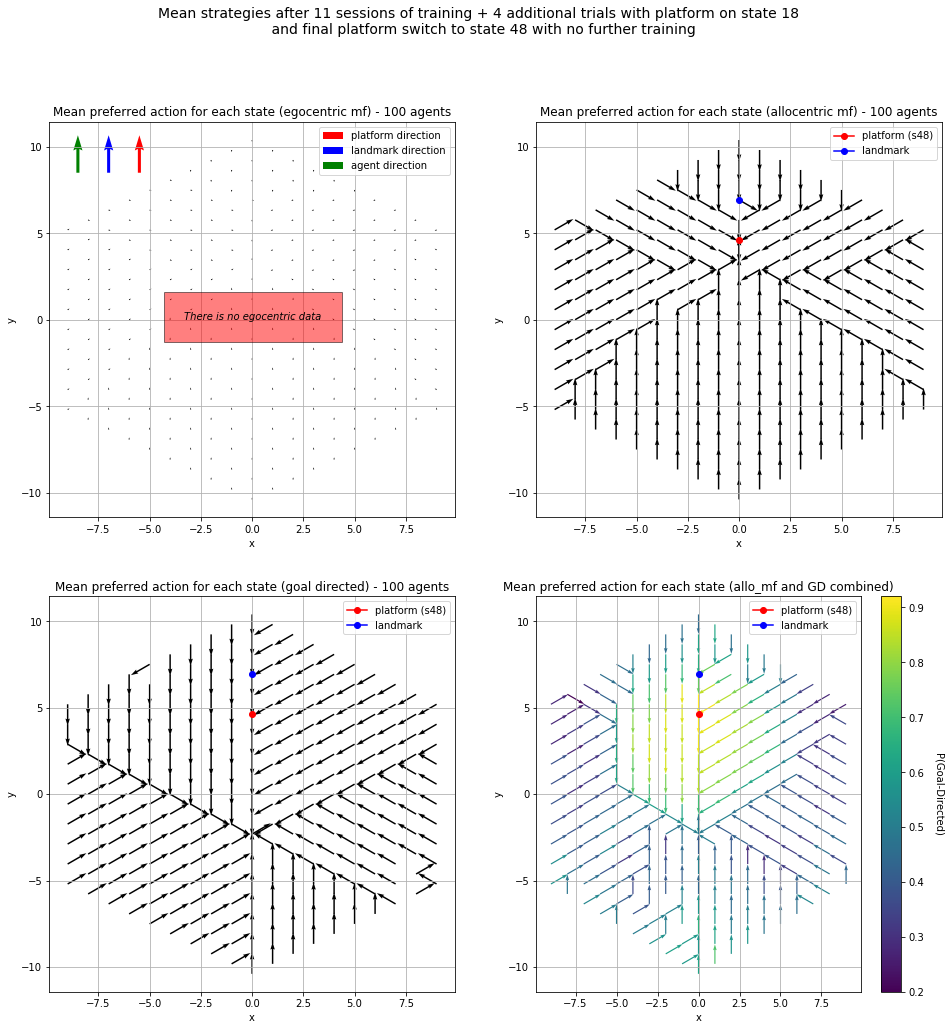

In [11]:
perform_group_pearce(env_params, ag_params)

## Lesioned agents training
#### Below are the performances of the model that always select the DLS strategy when the HPC is lesioned

In [40]:
lesion_HPC = True
lesion_PFC = True

In [41]:
create_path_main_pearce(env_params, ag_params) # data is stored here

'pearce_10411100True0.070.0282727270.745NoneNoneNoneNoneNone4MB500FalseFalseTrue'

Computing the mean performances of the agents...

Computing a two-way ANOVA on trial and session...
                           sum_sq      df           F        PR(>F)
C(session)           3.095307e+07    10.0  386.271035  0.000000e+00
C(trial)             3.655768e+05     3.0   15.207077  7.648025e-10
C(session):C(trial)  6.604418e+05    30.0    2.747272  1.045956e-06
Residual             3.490595e+07  4356.0         NaN           NaN

Computing the heading-vectors of each strategy...



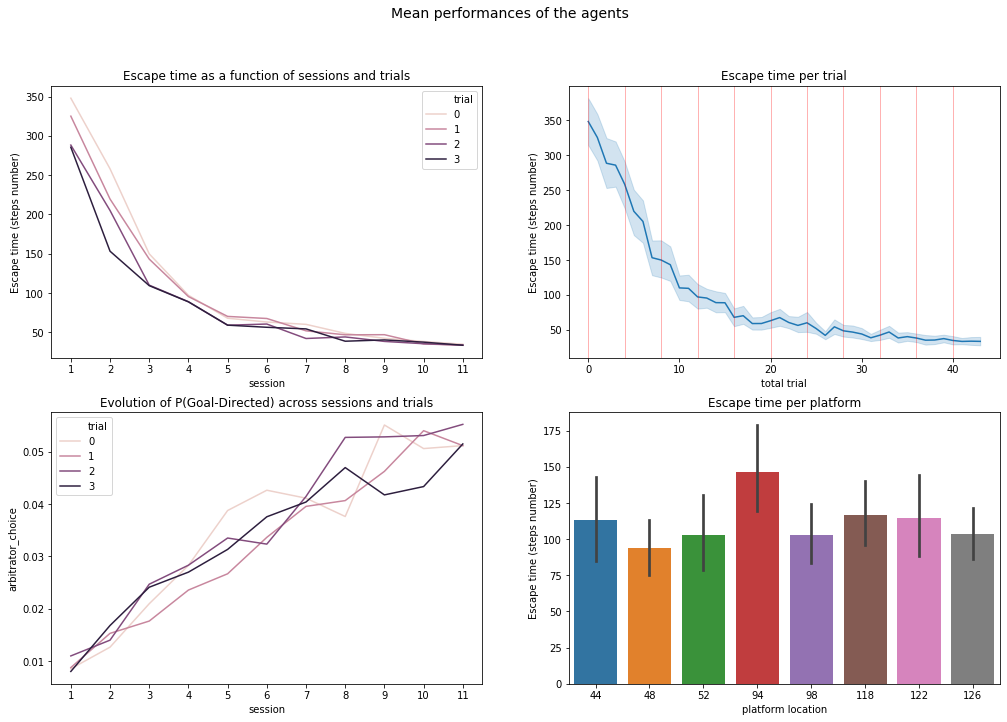

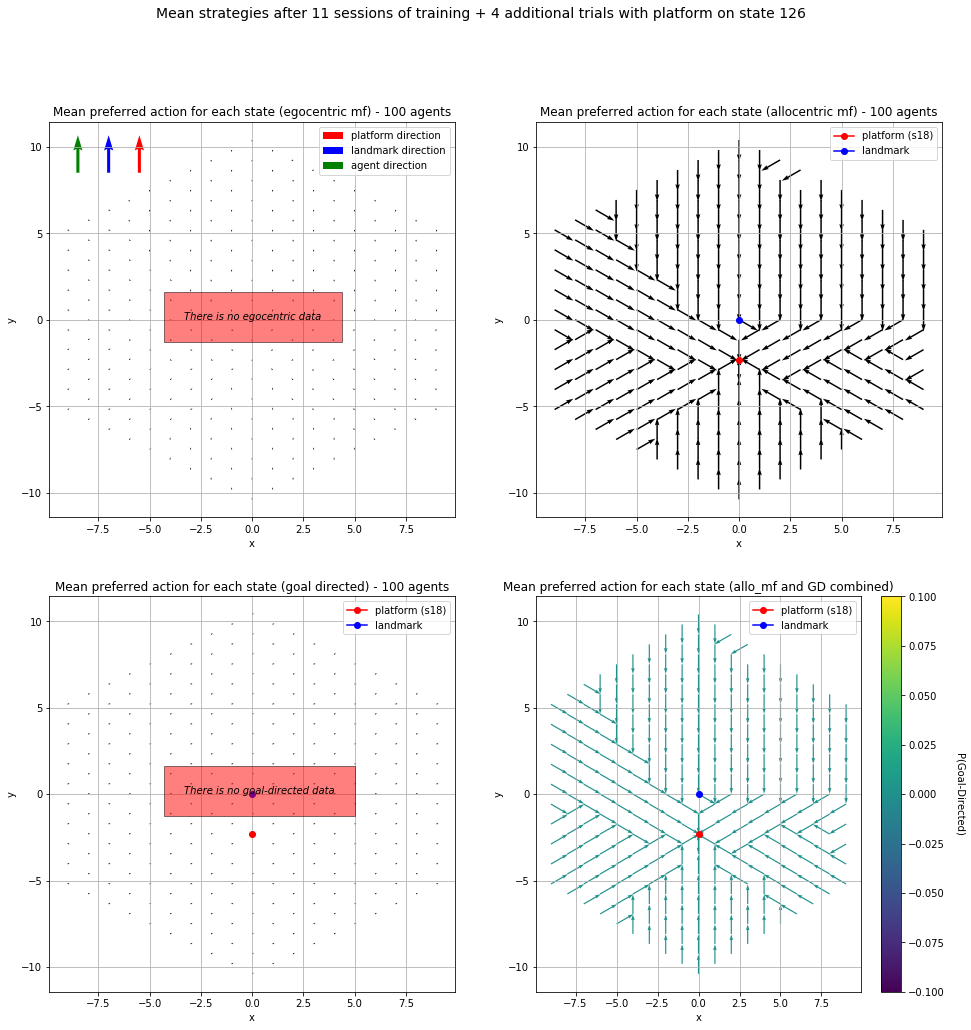

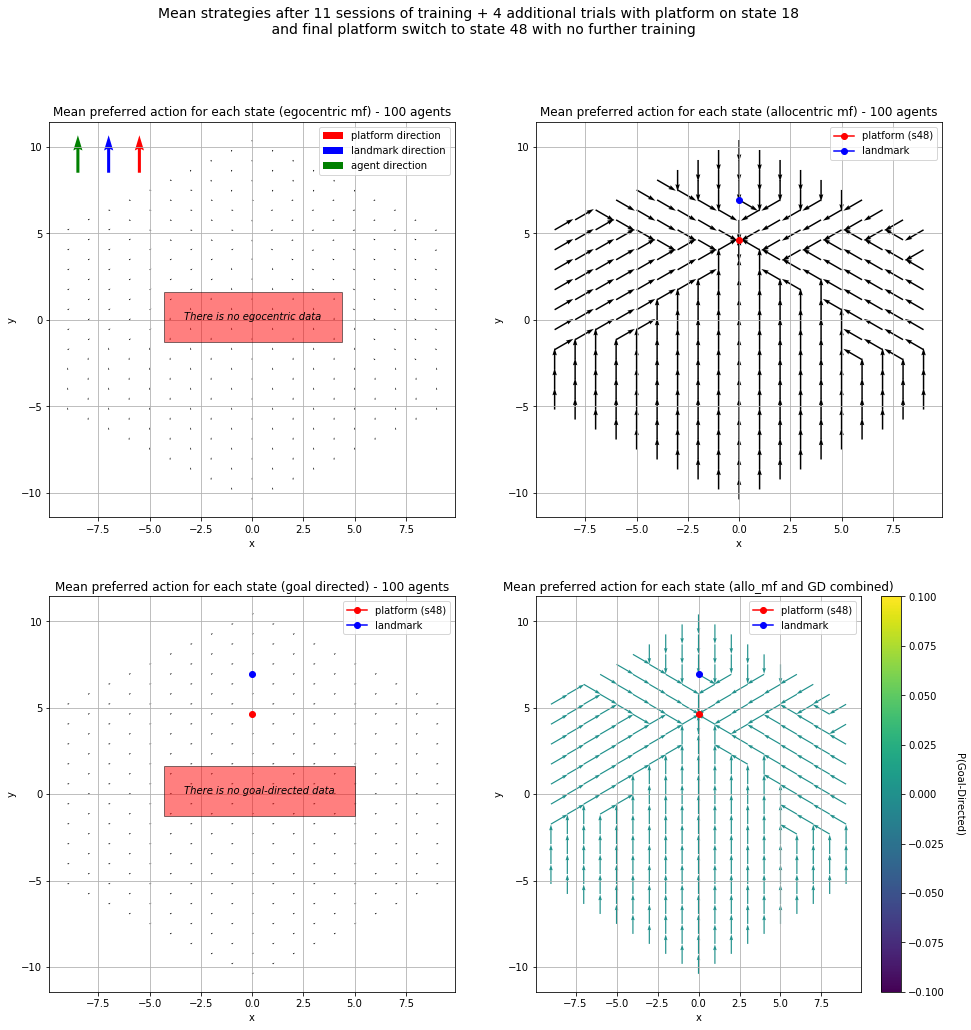

In [23]:
perform_group_pearce(env_params, ag_params)

Mean Square Error:  170.57312880602382


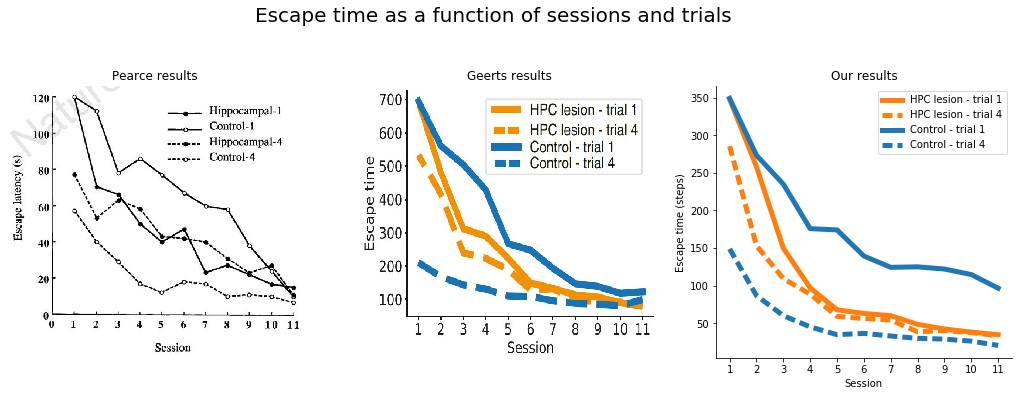

In [24]:
plot_pearce(env_params, ag_params, experimental_data=experimental_data_pearce)

#### Additional: Performances of the model that need to learn to select the DLS strategy when the HPC is lesioned

In [ ]:
lesion_HPC = True
lesion_PFC = False

In [42]:
create_path_main_pearce(env_params, ag_params) # data is stored here

'pearce_10411100True0.070.0282727270.745NoneNoneNoneNoneNone4MB500FalseFalseTrue'

Computing the mean performances of the agents...

Computing a two-way ANOVA on trial and session...
                           sum_sq      df           F    PR(>F)
C(session)           2.963933e+07    10.0  219.596765  0.000000
C(trial)             2.649469e+05     3.0    6.543276  0.000207
C(session):C(trial)  4.196065e+05    30.0    1.036283  0.411603
Residual             5.879363e+07  4356.0         NaN       NaN

Computing the heading-vectors of each strategy...



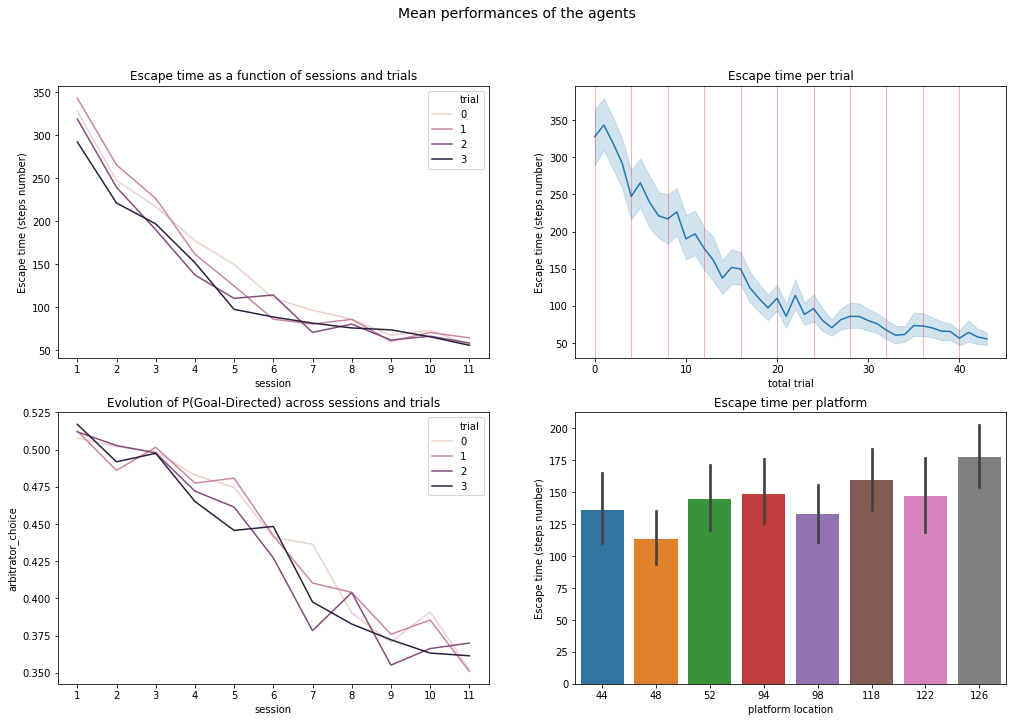

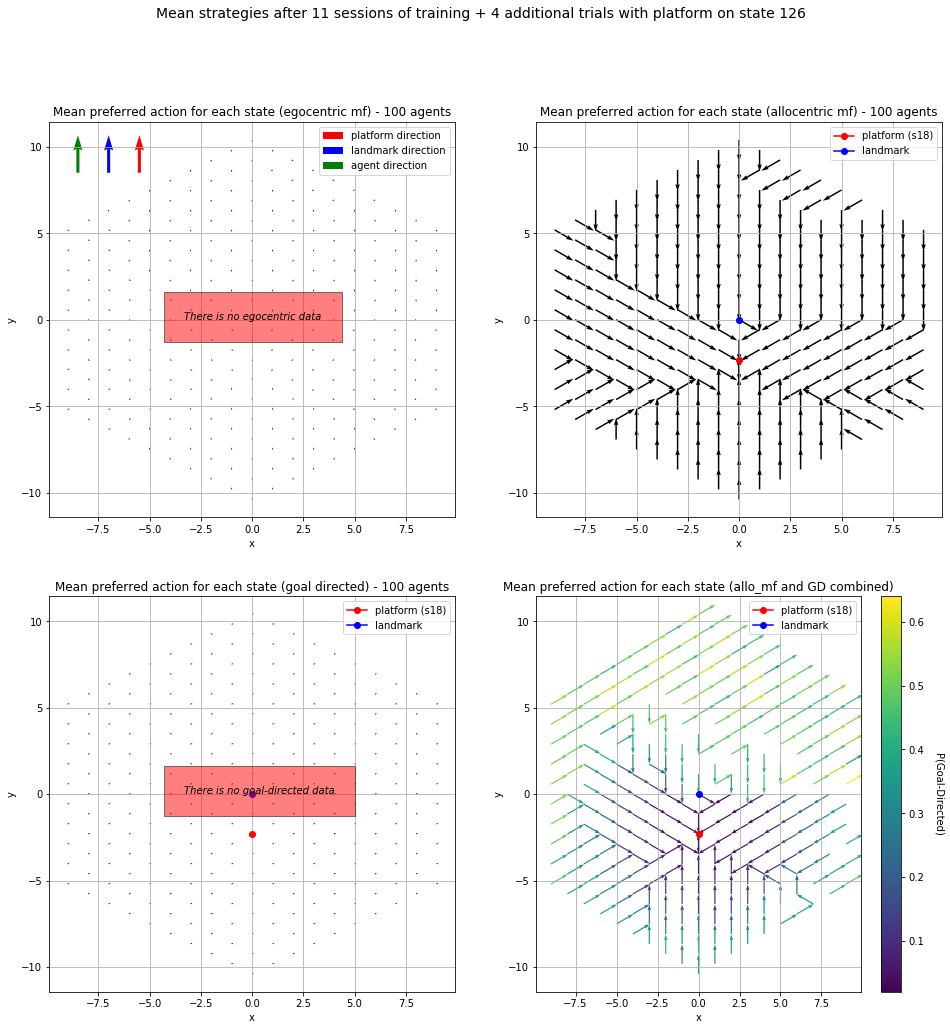

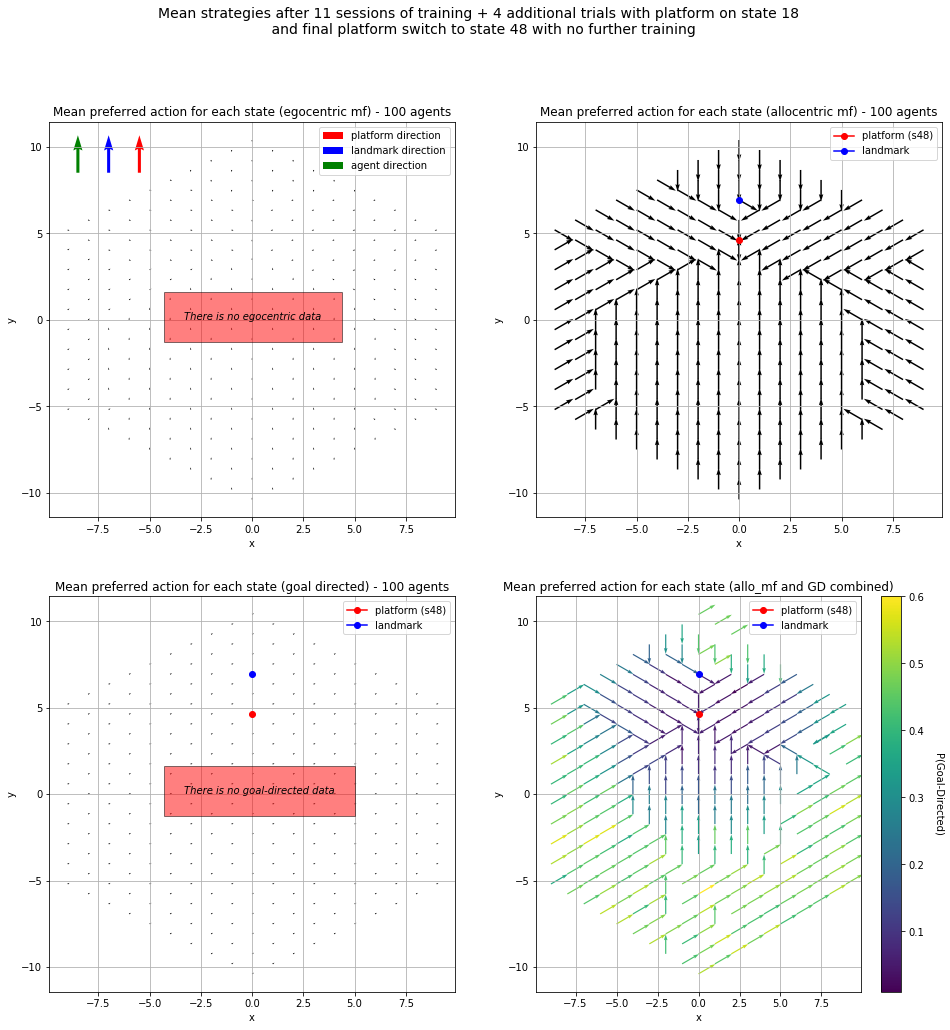

In [35]:
perform_group_pearce(env_params, ag_params)

Mean Square Error:  99.42114653348764


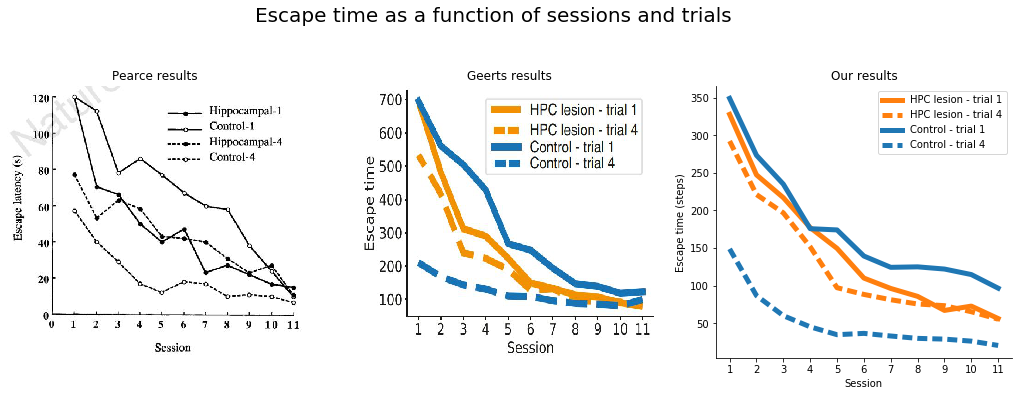

In [36]:
plot_pearce(env_params, ag_params, experimental_data=experimental_data_pearce)

# Testing the grid-search predictions: Rodrigo (2006) experiment

In [43]:
env_params = EnvironmentParams()
env_params.maze_size = 10
env_params.n_agents = 100
env_params.landmark_dist = 0
env_params.time_limit = 500
env_params.starting_states = [243,230,270,257]

ag_params = AgentsParams()
ag_params.mf_allo = True
ag_params.hpc_lr = 0.07
ag_params.q_lr = 0.20
ag_params.inv_temp_gd = 46
ag_params.inv_temp_mf = 46
ag_params.arbi_inv_temp = 46
ag_params.gamma = 0.86
ag_params.arbi_learning_rate = 0.031
ag_params.HPCmode = "MB"
ag_params.lesion_HPC = False
ag_params.lesion_DLS = False
ag_params.dolle = True
ag_params.lesion_PFC = False

In [44]:
create_path_rodrigo(env_params, ag_params) # data is stored here

'rodrigo_100True0.070.24646460.86NoneNoneNoneNoneNone0MB500FalseFalseTrue'

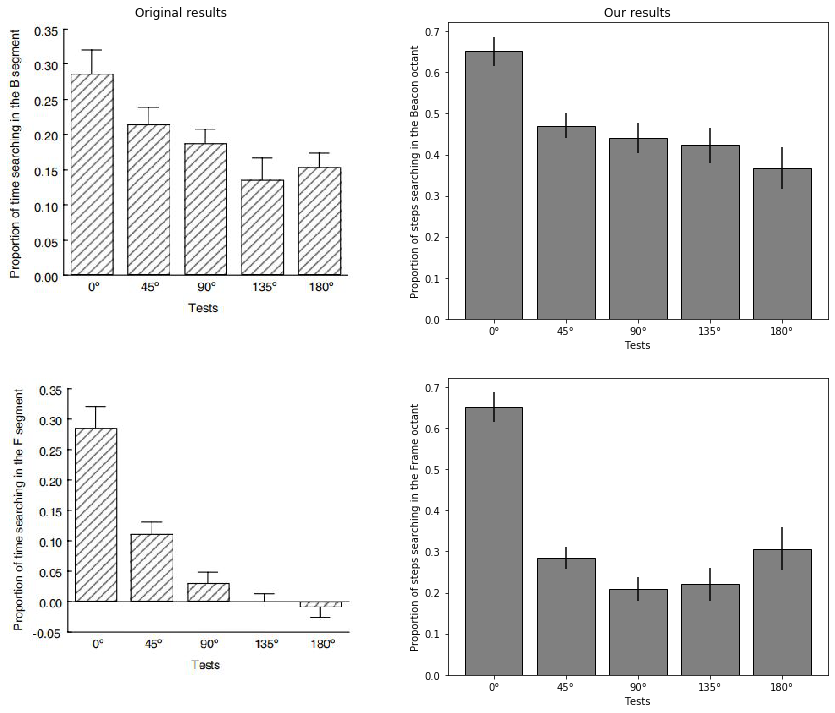

Concatenating all data
Computing proximal and distal octants mean occupation on test episodes
Performing statistical analyses
Helmert tests
p < 0.05 on 0° versus others (proximal beacon):  True
p < 0.05 on 45° versus others (proximal beacon):  True
p < 0.05 on 90° versus others (proximal beacon):  False
p < 0.05 on 0° versus others (distal beacon):  True
p < 0.05 on 45° versus others (distal beacon):  True
p < 0.05 on 90° versus others (distal beacon):  True

ANOVAS
Effect of angle on proximal beacon's octant occupation:  True
Effect of angle on distal beacon's octant occupation:  True

TTESTS
Proximal beacon's octant occupation different from chance:  True
Proximal beacon's octant occupation different from chance:  True
Proximal beacon's octant occupation different from chance:  True
Proximal beacon's octant occupation different from chance:  True
Proximal beacon's octant occupation different from chance:  True
Distal beacon's octant occupation different from chance:  True
Distal beac

In [15]:
perform_group_rodrigo(env_params, ag_params)

## Annex - Third experiment of Pearce 1998

In [21]:
env_params = EnvironmentParams()
env_params.maze_size = 10
env_params.n_sessions = 11
env_params.n_trials = 4
env_params.n_agents = 100
env_params.landmark_dist = 4
env_params.time_limit = 500
env_params.starting_states = [243,230,270,257]

ag_params = AgentsParams()
ag_params.mf_allo = True
ag_params.hpc_lr = 0.07
ag_params.q_lr = 0.028
ag_params.inv_temp_gd = 27
ag_params.inv_temp_mf = 27
ag_params.arbi_inv_temp = 27
ag_params.gamma = 0.745
ag_params.arbi_learning_rate = 0.053
ag_params.HPCmode = "MB"
ag_params.lesion_HPC = False
ag_params.lesion_DLS = False
ag_params.dolle = True
ag_params.lesion_PFC = False

#### Normal agents

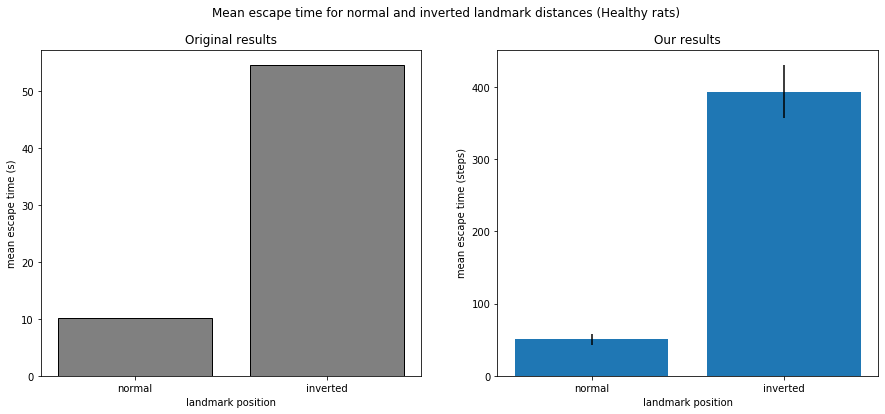

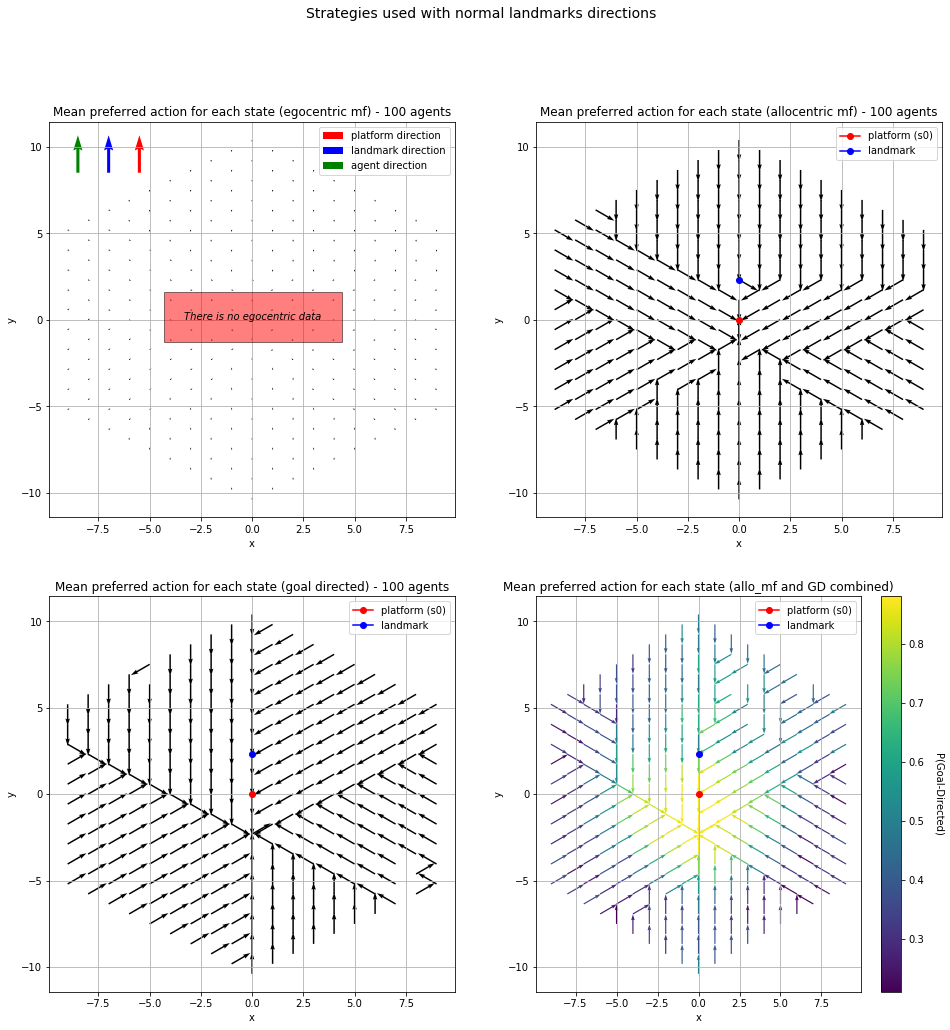

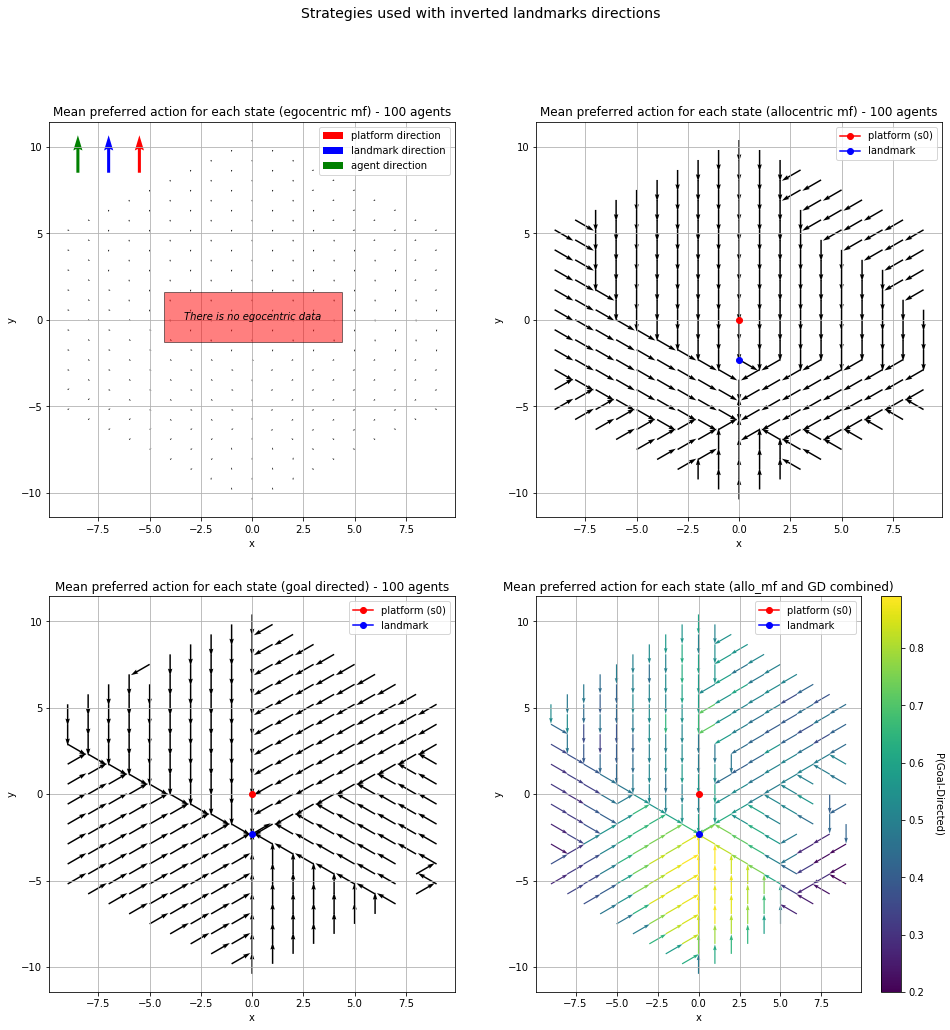

In [13]:
perform_group_exp3_pearce(env_params, ag_params) 

In [25]:
ag_params.lesion_HPC = True
ag_params.lesion_PFC = True

#### HPC-lesioned agents

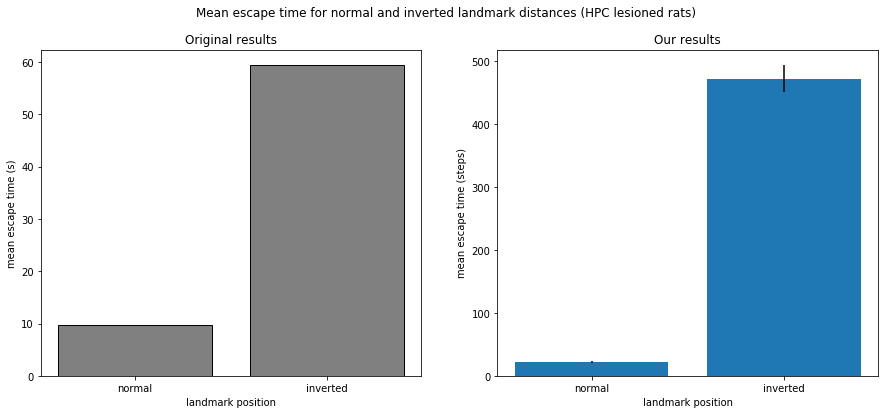

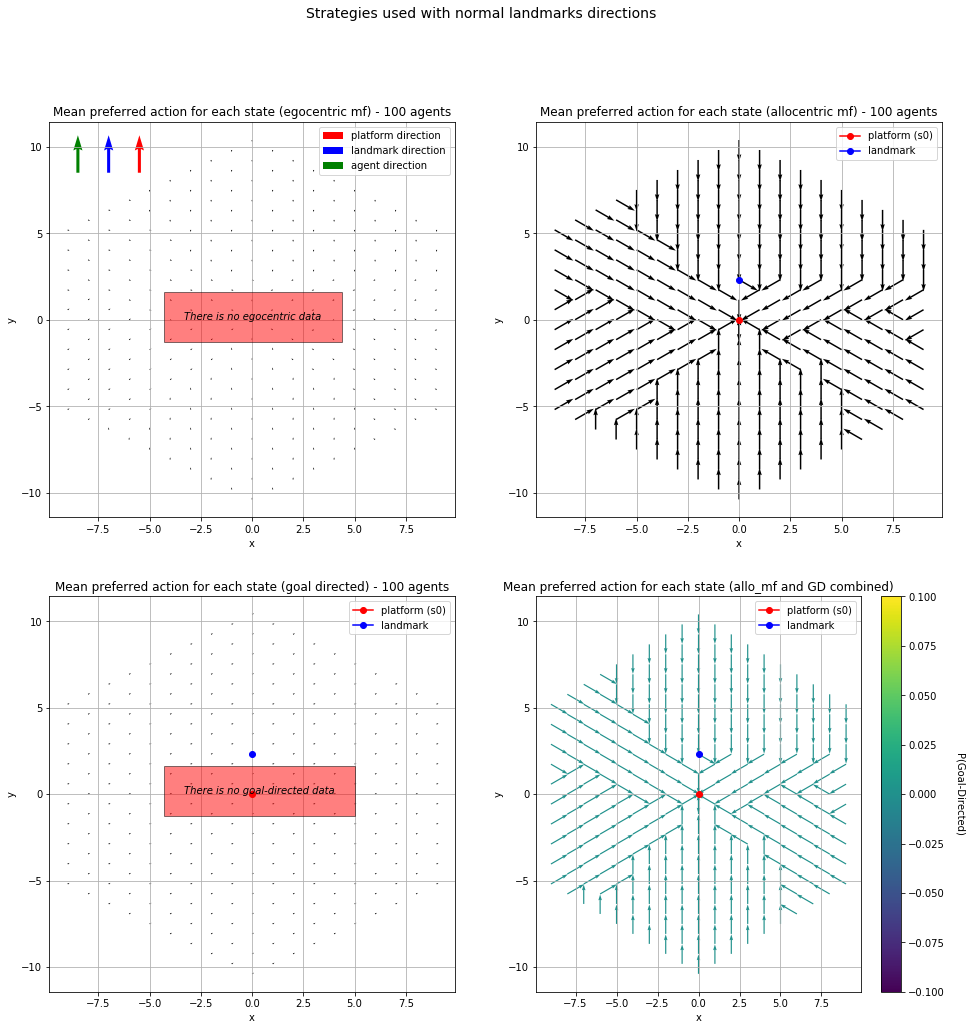

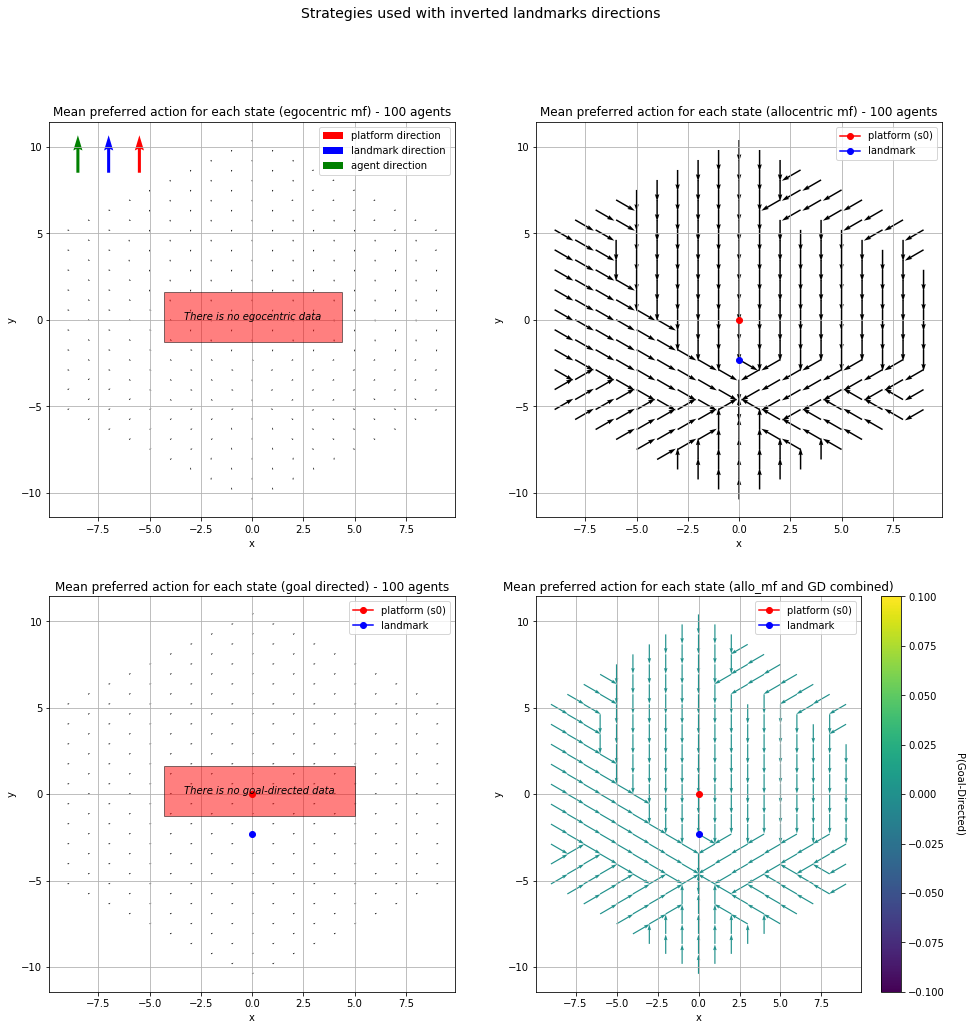

In [26]:
perform_group_exp3_pearce(env_params, ag_params) 